In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

#plt.style.use(['science', 'notebook'])
#%matplotlib inline


In [2]:
data_file = "conso.txt"

In [3]:
def read_text(filename):
    f = open(filename, "r")
    text = f.readlines()
    f.close()
    print(text)

#read_text(data_file)

In [4]:
def get_data(filename):    
    data = pd.read_csv(filename)
    #data['time'] = pd.to_datetime(data['time'])  #.dt.tz_convert(None)
    #data.info()
    #print(data.tail(5))
    return data


In [5]:
# read data with pandas
data = get_data(data_file)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Conso   1013 non-null   float64
dtypes: float64(1)
memory usage: 8.0 KB


In [6]:
data['interval']=3600/data['Conso']
data

,Conso,interval
0,0.19,18947.368421
1,0.19,18947.368421
2,0.19,18947.368421
3,0.19,18947.368421
4,0.19,18947.368421
...,...,...
1008,0.16,22500.000000
1009,0.16,22500.000000
1010,0.17,21176.470588
1011,0.17,21176.470588


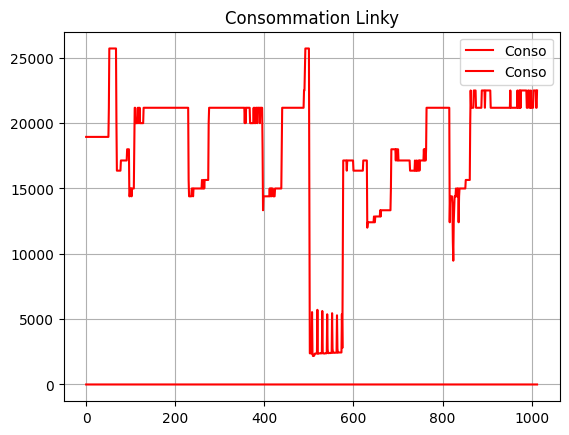

In [7]:

plt.title('Consommation Linky')
plt.plot(data, color='red',label='Conso')

plt.grid()
plt.legend()

### conso.csv sur WD6TB mis à jour avec PI4

In [8]:
def get_data2(filename):    
    data = pd.read_csv(filename, names=["Interval","kWh"])
    return data

In [9]:
old = False

if old:
    #conso_file = r"C:\Users\jean\Documents\conso.csv"
    conso_file = r"Y:\Documents\conso_old.csv"
    conso_file = r"Y:\Documents\conso - Copy (2).csv"
else:
    conso_file = r"Y:\Documents\conso.csv"
#old = False
conso_data = get_data2(conso_file)
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21697 entries, 0 to 21696
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Interval  21697 non-null  int64  
 1   kWh       21697 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 339.1 KB


In [10]:
conso_data = conso_data.dropna()
conso_data

,Interval,kWh
0,26289,0.14
1,26243,0.14
2,25885,0.14
3,25754,0.14
4,25774,0.14
...,...,...
21692,25262,0.14
21693,23905,0.15
21694,24058,0.15
21695,23789,0.15


In [11]:
conso_data['sec']=conso_data['Interval']/1000
conso_data['Wh']=3600000/conso_data['Interval']
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

conso_data

,Interval,kWh,sec,Wh,cumul(ms)
0,26289,0.14,26.289,136.939404,26289
1,26243,0.14,26.243,137.179438,52532
2,25885,0.14,25.885,139.076685,78417
3,25754,0.14,25.754,139.784111,104171
4,25774,0.14,25.774,139.675642,129945
...,...,...,...,...,...
21692,25262,0.14,25.262,142.506532,513919120
21693,23905,0.15,23.905,150.596110,513943025
21694,24058,0.15,24.058,149.638374,513967083
21695,23789,0.15,23.789,151.330447,513990872


In [12]:
# index dernier echantillon
l=len(conso_data)-1
l

21696

In [13]:
# cumtime = int(conso_data['cumul(ms)'].tail(1).values[0]*1000)
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

514015408000

In [14]:
old

False

In [15]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début


datetime.datetime(2024, 3, 7, 0, 23, 13, 907632)

In [16]:

if old:
    base = dt.datetime(2023, 8, 1, 10, 45, 0) - timedelta(microseconds=cumtime)


conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21697 entries, 0 to 21696
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   21697 non-null  int64         
 1   kWh        21697 non-null  float64       
 2   sec        21697 non-null  float64       
 3   Wh         21697 non-null  float64       
 4   cumul(ms)  21697 non-null  int64         
 5   dates      21697 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 1017.2 KB


In [17]:
conso_data['days']= [d.strftime('%d/%m/%Y') for d in conso_data['dates']]    #[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 00:23:40.196632,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 00:24:06.439632,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 00:24:32.324632,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 00:24:58.078632,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 00:25:23.852632,07/03/2024
...,...,...,...,...,...,...,...
21692,25262,0.14,25.262,142.506532,513919120,2024-03-12 23:08:33.027632,12/03/2024
21693,23905,0.15,23.905,150.596110,513943025,2024-03-12 23:08:56.932632,12/03/2024
21694,24058,0.15,24.058,149.638374,513967083,2024-03-12 23:09:20.990632,12/03/2024
21695,23789,0.15,23.789,151.330447,513990872,2024-03-12 23:09:44.779632,12/03/2024


In [18]:
#conso_data
conso_data.head(1),conso_data.tail(1)

(   Interval   kWh     sec          Wh  cumul(ms)                      dates  \
 0     26289  0.14  26.289  136.939404      26289 2024-03-07 00:23:40.196632   
 
          days  
 0  07/03/2024  ,
        Interval   kWh     sec          Wh  cumul(ms)  \
 21696     24536  0.15  24.536  146.723182  514015408   
 
                            dates        days  
 21696 2024-03-12 23:10:09.315632  12/03/2024  )

In [19]:
# tranche journalière
now = datetime.now()
day = now.strftime('%d/%m/%Y')    #str(now.month)+'-'+str(now.day)
day

'12/03/2024'

In [20]:
#manuel
#day = '11/03/2024'

conso_day = conso_data[conso_data['days']==day]
conso_jour = len(conso_day)
conso_jour

3441

In [21]:
conso_day.head(1), conso_day.tail(1)

(       Interval  kWh     sec          Wh  cumul(ms)  \
 18256     35443  0.1  35.443  101.571537  430623246   
 
                            dates        days  
 18256 2024-03-12 00:00:17.153632  12/03/2024  ,
        Interval   kWh     sec          Wh  cumul(ms)  \
 21696     24536  0.15  24.536  146.723182  514015408   
 
                            dates        days  
 21696 2024-03-12 23:10:09.315632  12/03/2024  )

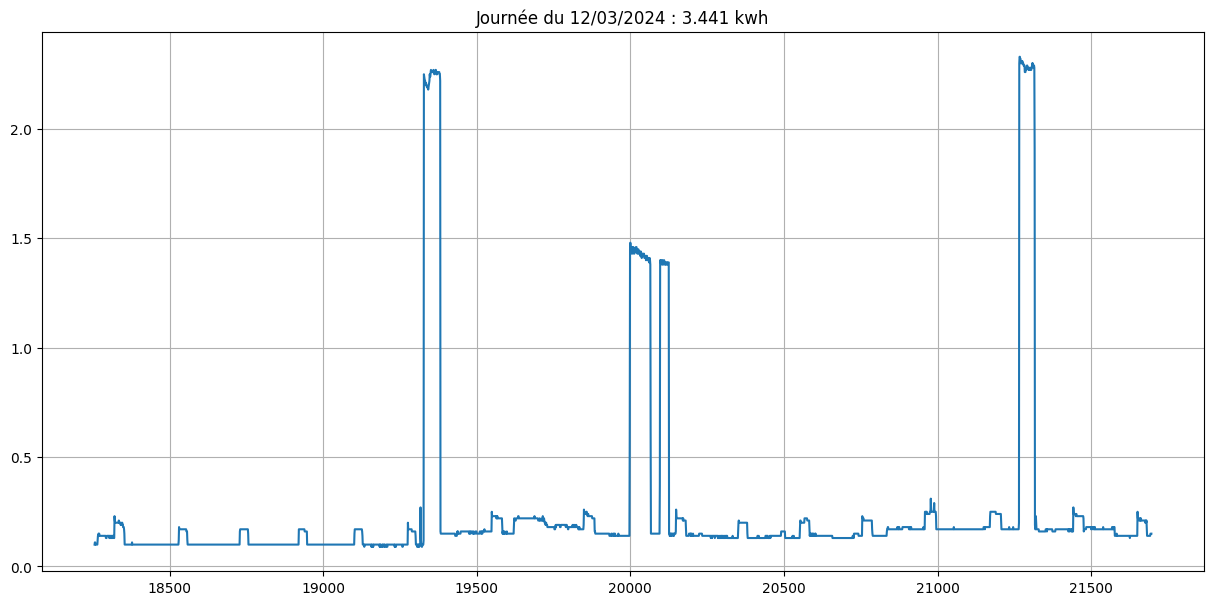

In [22]:
# consommation d'une journée entière à partir de minuit
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15, 7)
plt.plot(conso_day['kWh'])
plt.title(f'Journée du {day} : {conso_jour/1000} kwh')
plt.grid()

In [23]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

time = conso_data['dates']
time


0       2024-03-07 00:23:40.196632
1       2024-03-07 00:24:06.439632
2       2024-03-07 00:24:32.324632
3       2024-03-07 00:24:58.078632
4       2024-03-07 00:25:23.852632
                   ...            
21692   2024-03-12 23:08:33.027632
21693   2024-03-12 23:08:56.932632
21694   2024-03-12 23:09:20.990632
21695   2024-03-12 23:09:44.779632
21696   2024-03-12 23:10:09.315632
Name: dates, Length: 21697, dtype: datetime64[ns]

In [24]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [25]:
if not old:
    major_ticks=1/60;minor_ticks=1/240  # plus de ticks, 4 fois plus de minor
    major_ticks=1/30;minor_ticks=1/120   # moins de ticks
    major_ticks=1/15;minor_ticks=1/60
    major_ticks=1/2;minor_ticks=1/8
else:
    major_ticks=4;minor_ticks=1   # encore moins si int


In [26]:
major_ticks=4;minor_ticks=1
major_ticks,minor_ticks

(4, 1)

## Main graph

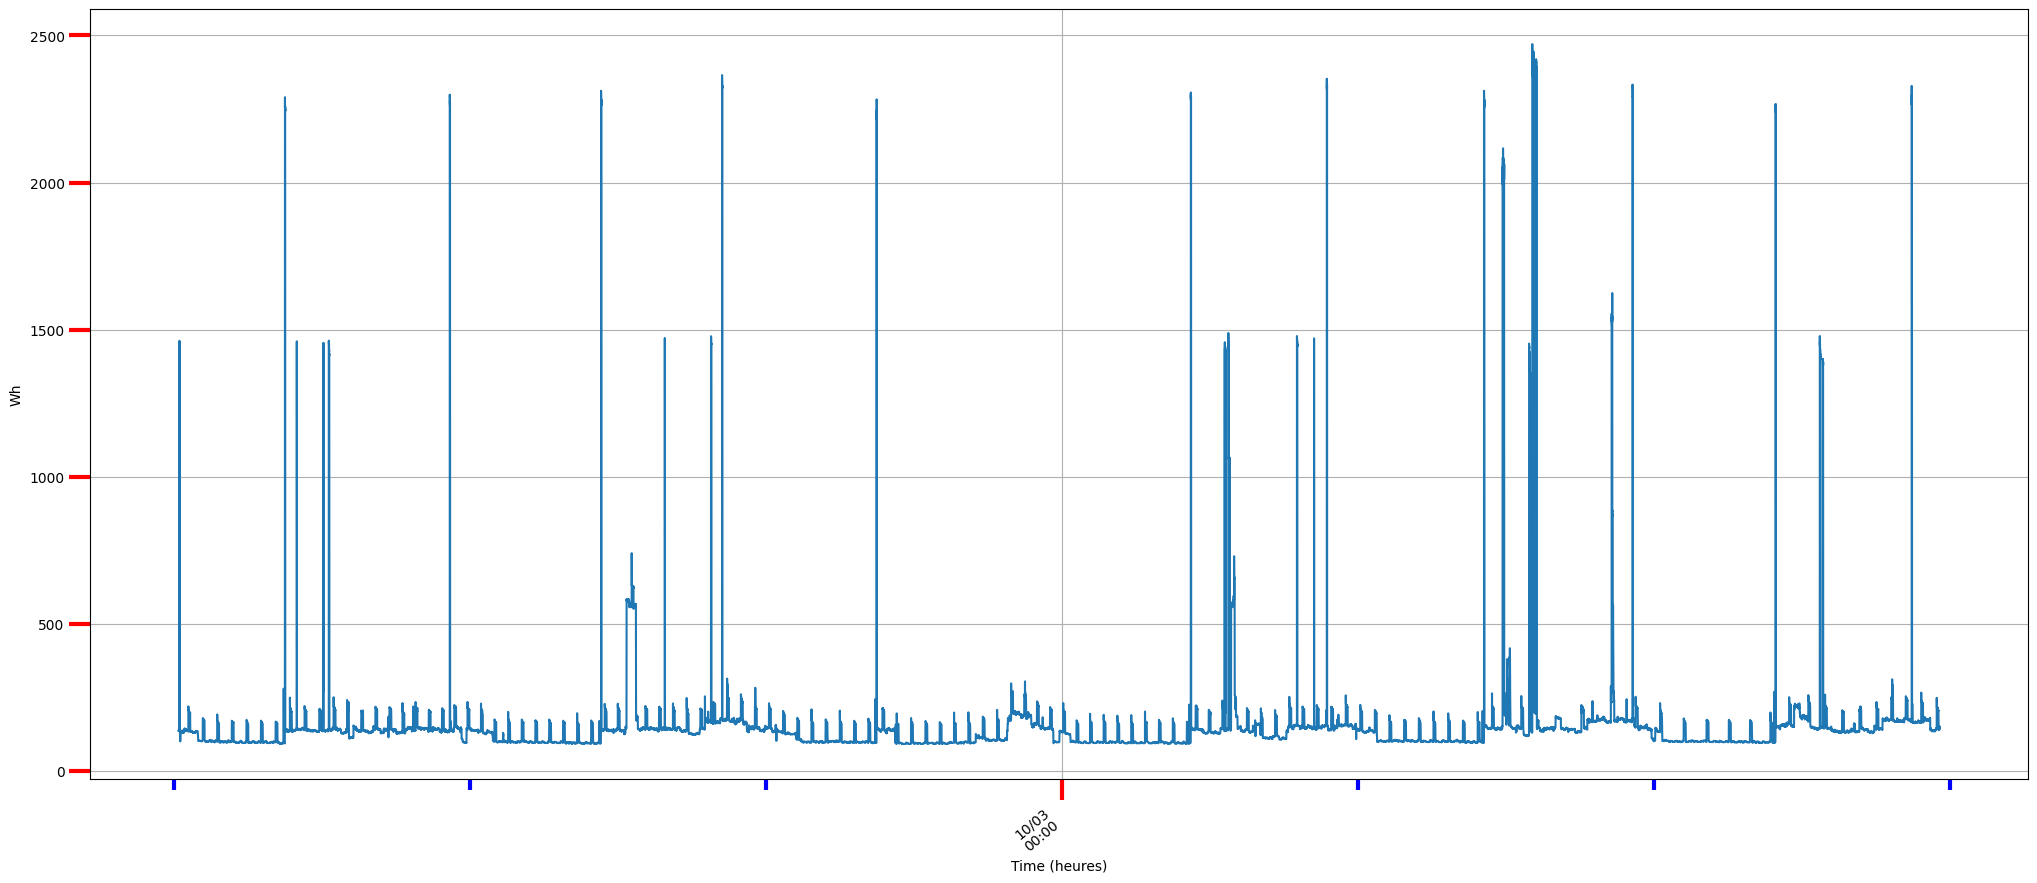

In [27]:

from matplotlib.dates import (YEARLY, DateFormatter,rrulewrapper, RRuleLocator, drange)

def show_graph():
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(25, 10)

    #plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
    
    #formatter = DateFormatter('%d/%m\n%H:%M:%S')
    formatter = DateFormatter('%d/%m\n%H:%M')
    ax.xaxis.set_major_formatter(formatter)

    # ticks sur axe des x
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # minor ticks tous les 5 min
    ax.tick_params(which='both', width=3)
    ax.tick_params(which='major', length=15, color='r')
    ax.tick_params(which='minor', length=8, color='b')

    #plt.plot(conso_data['cumul(ms)']/3600000,conso_data['Wh'])
    plt.plot(time,conso_data['Wh'])
    plt.ylabel('Wh')
    plt.xlabel('Time (heures)')
    #format_date(10)
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')

    #fig.autofmt_xdate()
    
    plt.grid()
    plt.show()
show_graph()

In [28]:
cumul_conso = len(conso_data)
conso_data.tail(1)

,Interval,kWh,sec,Wh,cumul(ms),dates,days
21696,24536,0.15,24.536,146.723182,514015408,2024-03-12 23:10:09.315632,12/03/2024


In [29]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

514015408000

# Slice of last 1 kWh

In [30]:
l = len(conso_data)  # total watt consommés
l

21697

In [31]:
k = 1
taille = k*1000  # fenetre k*1000 watt consommés
l,taille

(21697, 1000)

In [32]:
if l<1000:
    part = 1
else: part = 1/2
#taille = int(part*l)
taille

1000

In [33]:
data = conso_data.tail(taille)
len(data),data

(1000,
        Interval   kWh     sec          Wh  cumul(ms)  \
 20697     26677  0.13  26.677  134.947708  494046875   
 20698     27087  0.13  27.087  132.905084  494073962   
 20699     27151  0.13  27.151  132.591801  494101113   
 20700     26967  0.13  26.967  133.496496  494128080   
 20701     27187  0.13  27.187  132.416228  494155267   
 ...         ...   ...     ...         ...        ...   
 21692     25262  0.14  25.262  142.506532  513919120   
 21693     23905  0.15  23.905  150.596110  513943025   
 21694     24058  0.15  24.058  149.638374  513967083   
 21695     23789  0.15  23.789  151.330447  513990872   
 21696     24536  0.15  24.536  146.723182  514015408   
 
                            dates        days  
 20697 2024-03-12 17:37:20.782632  12/03/2024  
 20698 2024-03-12 17:37:47.869632  12/03/2024  
 20699 2024-03-12 17:38:15.020632  12/03/2024  
 20700 2024-03-12 17:38:41.987632  12/03/2024  
 20701 2024-03-12 17:39:09.174632  12/03/2024  
 ...               

In [34]:
now = datetime.now()
# conso.csv dynamique
cumtime_start= int(conso_data._get_value(l-taille+1,'cumul(ms)')*1000) # conversion microseconds


In [35]:
cumtime_end= int(data._get_value(l-1,'cumul(ms)')*1000) # conversion microseconds


In [36]:
cumtime_end,cumtime_start

(514015408000, 494073962000)

In [37]:
#last_interval = int(data._get_value(l,'Interval')*1000) # conversion microseconds
delta_cumtime = cumtime_end - cumtime_start #+ last_interval
delta_cumtime

19941446000

In [38]:

base = now - timedelta(microseconds=delta_cumtime)
now,base, data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')


(datetime.datetime(2024, 3, 12, 23, 10, 11, 741238),
 datetime.datetime(2024, 3, 12, 17, 37, 50, 295238),
 '12/03/2024 23:10:09')

In [39]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 00:23:40.196632,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 00:24:06.439632,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 00:24:32.324632,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 00:24:58.078632,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 00:25:23.852632,07/03/2024
...,...,...,...,...,...,...,...
21692,25262,0.14,25.262,142.506532,513919120,2024-03-12 23:08:33.027632,12/03/2024
21693,23905,0.15,23.905,150.596110,513943025,2024-03-12 23:08:56.932632,12/03/2024
21694,24058,0.15,24.058,149.638374,513967083,2024-03-12 23:09:20.990632,12/03/2024
21695,23789,0.15,23.789,151.330447,513990872,2024-03-12 23:09:44.779632,12/03/2024


In [40]:
end = conso_data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')
start = conso_data['dates'][l-taille+1].strftime('%d/%m/%Y %H:%M:%S')
start,end

('12/03/2024 17:37:47', '12/03/2024 23:10:09')

In [41]:
data.head(1)['dates'].to_string(index=False),data.tail(1)['dates'].to_string(index=False)

('2024-03-12 17:37:20.782632', '2024-03-12 23:10:09.315632')

In [42]:
k

1

In [43]:
data.Interval.tail(1000)

20697    26677
20698    27087
20699    27151
20700    26967
20701    27187
         ...  
21692    25262
21693    23905
21694    24058
21695    23789
21696    24536
Name: Interval, Length: 1000, dtype: int64

In [44]:
conversion_us_heure = 1/1000/60/60 
temps_1kWh = sum(data.Interval.tail(1000))*conversion_us_heure  #somme 1000 interval = temps conso 1 kWh
conso_jour = 24/temps_1kWh
heure = int(temps_1kWh)
mn = (temps_1kWh - heure)*60
sec = (mn - int(mn))*60
temps_1kWh, conso_jour,heure,int(mn),int(sec)

(5.554225000000001, 4.321034887855641, 5, 33, 15)

In [45]:
data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')

C:\Users\jean\AppData\Local\Temp\ipykernel_11876\3458501435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')


In [46]:
data

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
20697,26677,0.13,26.677,134.947708,494046875,2024-03-12 17:37:20.782632,12/03/2024,2024-03-12 17:37:20.782632
20698,27087,0.13,27.087,132.905084,494073962,2024-03-12 17:37:47.869632,12/03/2024,2024-03-12 17:37:47.869632
20699,27151,0.13,27.151,132.591801,494101113,2024-03-12 17:38:15.020632,12/03/2024,2024-03-12 17:38:15.020632
20700,26967,0.13,26.967,133.496496,494128080,2024-03-12 17:38:41.987632,12/03/2024,2024-03-12 17:38:41.987632
20701,27187,0.13,27.187,132.416228,494155267,2024-03-12 17:39:09.174632,12/03/2024,2024-03-12 17:39:09.174632
...,...,...,...,...,...,...,...,...
21692,25262,0.14,25.262,142.506532,513919120,2024-03-12 23:08:33.027632,12/03/2024,2024-03-12 23:08:33.027632
21693,23905,0.15,23.905,150.596110,513943025,2024-03-12 23:08:56.932632,12/03/2024,2024-03-12 23:08:56.932632
21694,24058,0.15,24.058,149.638374,513967083,2024-03-12 23:09:20.990632,12/03/2024,2024-03-12 23:09:20.990632
21695,23789,0.15,23.789,151.330447,513990872,2024-03-12 23:09:44.779632,12/03/2024,2024-03-12 23:09:44.779632


<Axes: >

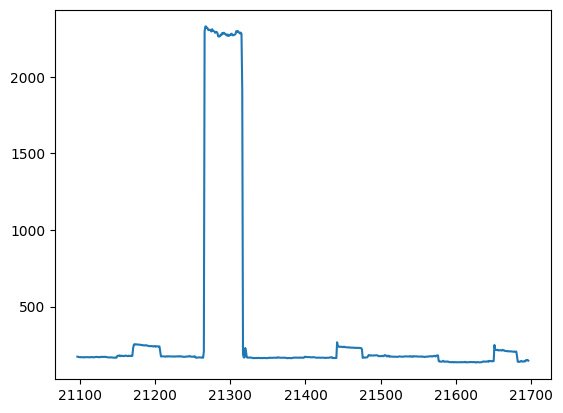

In [47]:
data.tail(600)['Wh'].plot()

In [48]:
data['Wh']

20697    134.947708
20698    132.905084
20699    132.591801
20700    133.496496
20701    132.416228
            ...    
21692    142.506532
21693    150.596110
21694    149.638374
21695    151.330447
21696    146.723182
Name: Wh, Length: 1000, dtype: float64

# k kW window graph

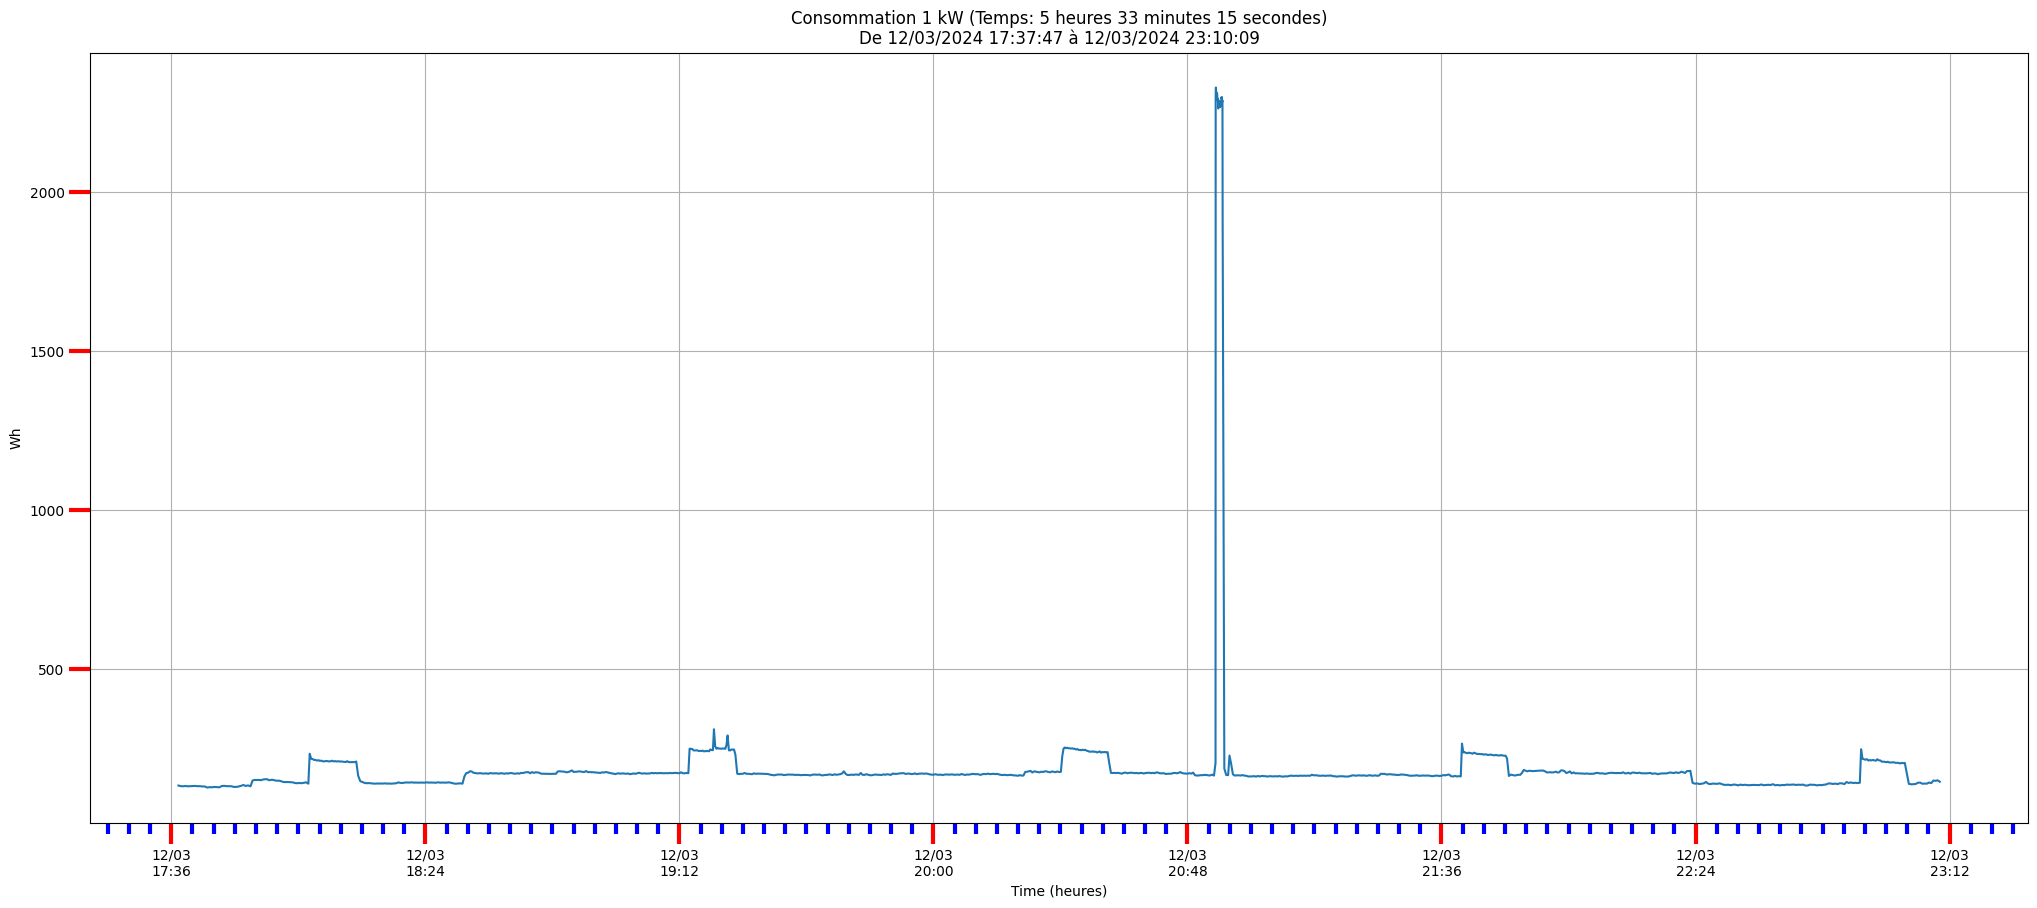

In [49]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)

formatter = DateFormatter('%d/%m\n%H:%M')
ax.xaxis.set_major_formatter(formatter)

# ticks sur axe des x
major_ticks=1/30;minor_ticks=1/360
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # 1 major tick tous les 48 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # 1 minor ticks tous les 4 min
ax.tick_params(which='both', width=3)
ax.tick_params(which='major', length=15, color='r')
ax.tick_params(which='minor', length=8, color='b')

plt.title(f'Consommation {k} kW (Temps: {heure} heures {int(mn)} minutes {int(sec)} secondes)\nDe {start} à {end}')
plt.plot(data['dates'],data['Wh'])
plt.ylabel('Wh')
plt.xlabel('Time (heures)')
plt.grid()


<Axes: ylabel='Frequency'>

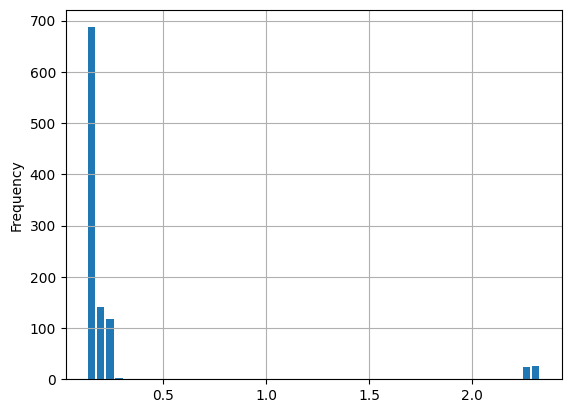

In [50]:
data.kWh.plot.hist(bins=50,rwidth=0.8,grid=True)


In [51]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms),dates,days
21692,25262,0.14,25.262,142.506532,513919120,2024-03-12 23:08:33.027632,12/03/2024
21693,23905,0.15,23.905,150.596110,513943025,2024-03-12 23:08:56.932632,12/03/2024
21694,24058,0.15,24.058,149.638374,513967083,2024-03-12 23:09:20.990632,12/03/2024
21695,23789,0.15,23.789,151.330447,513990872,2024-03-12 23:09:44.779632,12/03/2024
21696,24536,0.15,24.536,146.723182,514015408,2024-03-12 23:10:09.315632,12/03/2024


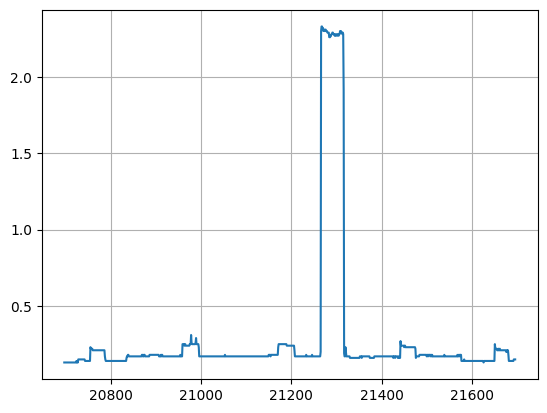

In [52]:
conso_data.tail(1000)['kWh'].plot()
plt.grid()

In [53]:
#plt.plot(conso_data['sec'])
now = dt.datetime.now()
last_cumul = np.array(conso_data['cumul(ms)'].tail(1))[0]*1000.0  # us
last_cumul, last_cumul/60e6  # min

(514015408000.0, 8566.923466666667)

In [54]:
begin = now - dt.timedelta(microseconds=last_cumul)  #2023, 6, 24, 9, 14, (39, 942895) approximatif
now, begin

(datetime.datetime(2024, 3, 12, 23, 10, 15, 396314),
 datetime.datetime(2024, 3, 7, 0, 23, 19, 988314))

In [55]:
x = mdates.drange(begin,now,dt.timedelta(microseconds=1000000))  # seconds
len(conso_data),len(x),len(x)/3600

(21697, 514016, 142.78222222222223)

In [56]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [57]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
base = dt.datetime(2005, 2, 1)
dates = [base + dt.timedelta(hours=(2 * i)) for i in range(732)]
N = len(dates)
N


732

In [58]:
732/12 # 60 jours

61.0

In [59]:
dates[0],dates[-1]

(datetime.datetime(2005, 2, 1, 0, 0), datetime.datetime(2005, 4, 2, 22, 0))

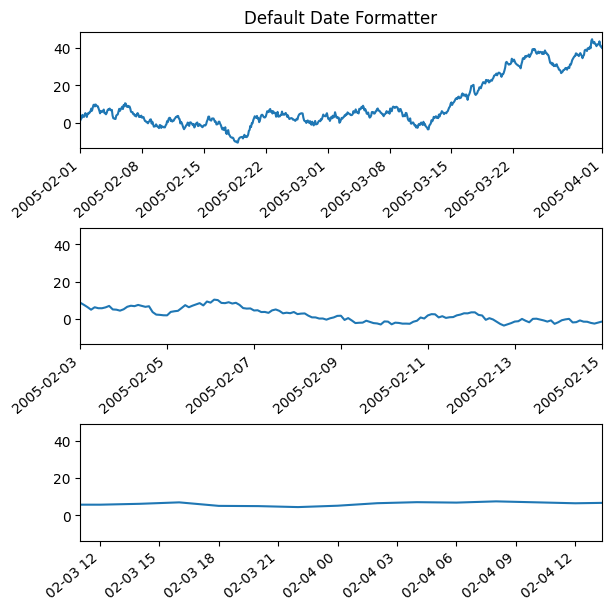

In [60]:
np.random.seed(19680801)
y = np.cumsum(np.random.randn(N))

fig, axs = plt.subplots(3, 1, layout='constrained', figsize=(6, 6))
lims = [(np.datetime64('2005-02'), np.datetime64('2005-04')),
        (np.datetime64('2005-02-03'), np.datetime64('2005-02-15')),
        (np.datetime64('2005-02-03 11:00'), np.datetime64('2005-02-04 13:20'))]
for nn, ax in enumerate(axs):
    ax.plot(dates, y)
    ax.set_xlim(lims[nn])
    # rotate_labels...
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')
axs[0].set_title('Default Date Formatter')
plt.show()

In [61]:
t = dt.datetime(2005, 4, 2, 22, 0)
t

datetime.datetime(2005, 4, 2, 22, 0)